In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from scipy.stats.mstats import gmean

In [ ]:
# 구글 마운트 시키기
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# 가중치 계산

In [ ]:
# 쌍대비교행렬
np01 = np.array([[1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1]])

In [ ]:
# 불법주정차 대수 뺀 쌍대비교행렬
np01 = np.array([[1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [3, 3, 2, 2, 2, 2, 1, 1, 1],
                 [3, 3, 2, 2, 2, 2, 1, 1, 1],
                 [3, 3, 2, 2, 2, 2, 1, 1, 1]])

In [ ]:
print(np01)

[[1.         1.         0.5        0.5        0.5        0.5
  0.33333333 0.33333333 0.33333333]
 [1.         1.         0.5        0.5        0.5        0.5
  0.33333333 0.33333333 0.33333333]
 [2.         2.         1.         1.         1.         1.
  0.5        0.5        0.5       ]
 [2.         2.         1.         1.         1.         1.
  0.5        0.5        0.5       ]
 [2.         2.         1.         1.         1.         1.
  0.5        0.5        0.5       ]
 [2.         2.         1.         1.         1.         1.
  0.5        0.5        0.5       ]
 [3.         3.         2.         2.         2.         2.
  1.         1.         1.        ]
 [3.         3.         2.         2.         2.         2.
  1.         1.         1.        ]
 [3.         3.         2.         2.         2.         2.
  1.         1.         1.        ]]


In [ ]:
np02 = np.dot(np01, np01)

In [ ]:
print(np02)

[[ 9.          9.          5.          5.          5.          5.
   2.66666667  2.66666667  2.66666667]
 [ 9.          9.          5.          5.          5.          5.
   2.66666667  2.66666667  2.66666667]
 [16.5        16.5         9.          9.          9.          9.
   4.83333333  4.83333333  4.83333333]
 [16.5        16.5         9.          9.          9.          9.
   4.83333333  4.83333333  4.83333333]
 [16.5        16.5         9.          9.          9.          9.
   4.83333333  4.83333333  4.83333333]
 [16.5        16.5         9.          9.          9.          9.
   4.83333333  4.83333333  4.83333333]
 [31.         31.         17.         17.         17.         17.
   9.          9.          9.        ]
 [31.         31.         17.         17.         17.         17.
   9.          9.          9.        ]
 [31.         31.         17.         17.         17.         17.
   9.          9.          9.        ]]


In [ ]:
np03 = np02.sum(axis=0)

In [ ]:
print(np03)

[177.         177.          97.          97.          97.
  97.          51.66666667  51.66666667  51.66666667]


In [ ]:
np04 = np03/np03.sum()

### 가중치 계산 결과 

In [ ]:
print(np04)

[0.19732441 0.19732441 0.10813824 0.10813824 0.10813824 0.10813824
 0.05759941 0.05759941 0.05759941]


In [ ]:
#0.19732441 0.19732441 0.10813824 0.10813824 0.10813824 0.10813824 0.05759941 0.05759941 0.05759941
# 차례대로 생활인구, 주차장구획수, 
# 외식업 점포수, 소매업 점포수, 서비스업 점포수, 차량등록대수
# 세대수, 자치구 면적, 총인구수

# 주차수요 계산

### 데이터 전처리

In [ ]:
# 데이터 불러오기
EA = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_외식점포수_최종.csv", encoding = 'cp949')
SE = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_소매업점포수_최종.csv", encoding = 'cp949')
SV = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_서비스업점포수_최종.csv", encoding = 'cp949')
CA = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_자동차등록대수_최종.csv", encoding = 'cp949')
GE = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/202212_중구_세대수_최종.csv", encoding = 'cp949')
AR = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_동별면적수_최종.csv", encoding = 'cp949')
PO = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_주민등록인구수_최종.csv", encoding = 'cp949')

In [ ]:
CA

,읍면동,합계
0,중구 소공동,3421
1,중구 회현동,10710
2,중구 명동,7195
3,중구 필동,2125
4,중구 장충동,1297
5,중구 광희동,2570
6,중구 을지로동,1596
7,중구 신당동,3513
8,중구 다산동,3398
9,중구 약수동,4748


In [ ]:
df = pd.concat([EA, SE, SV, CA, GE, AR, PO], axis=1)
df

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수
0,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228
1,회현동,657,회현동,4350,회현동,305,중구 회현동,10710,서울특별시 중구 회현동(1114054000),2561,회현동,0.84,회현동,4506
2,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728
3,필동,493,필동,384,필동,299,중구 필동,2125,서울특별시 중구 필동(1114057000),2431,필동,1.14,필동,3938
4,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577
5,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429
6,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674
7,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607
8,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486
9,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347


In [ ]:
df1= df.sort_values(by='읍면동')

In [ ]:
df1 = df1.reset_index(drop=True)
df1

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수
0,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429
1,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486
2,동화동,130,동화동,336,동화동,175,중구 동화동,2949,서울특별시 중구 동화동(1114066500),3989,동화동,0.26,동화동,10033
3,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728
4,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228
5,신당5동,267,신당5동,347,신당5동,189,중구 신당5동,2932,서울특별시 중구 신당제5동(1114065000),5334,신당5동,0.39,신당5동,10127
6,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607
7,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347
8,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674
9,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577


### 생활인구 계산

In [ ]:
map_data = {"dong":["소공동","회현동","명동","필동","장충동","광희동","을지로동","신당동",
                         "다산동","약수동","청구동","동화동","황학동","중림동","신당5동"],
            "day":[691800000,616600000,870700000,238700000,185900000,402700000,383300000,279200000,167200000,123600000,
                   98320000,99670000,123200000,123200000,314577900],
            "night":[92720000,83720000,118100000,82170000,84360000,179500000,90470000,156580000,
                     150700000,153900000,126300000,108600000,14300000,14300000,103980000]}
Map_data = pd.DataFrame(map_data)
Map_data = Map_data.sort_values("dong")
Map_data = Map_data.reset_index(drop=True)
Map_data
# 신당5동 데이터가 결측치라 평균값으로 메꿈

,dong,day,night
0,광희동,402700000,179500000
1,다산동,167200000,150700000
2,동화동,99670000,108600000
3,명동,870700000,118100000
4,소공동,691800000,92720000
5,신당5동,314577900,103980000
6,신당동,279200000,156580000
7,약수동,123600000,153900000
8,을지로동,383300000,90470000
9,장충동,185900000,84360000


In [ ]:
df2 = pd.concat([df1, Map_data], axis=1)
df2

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수,dong,day,night
0,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429,광희동,402700000,179500000
1,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486,다산동,167200000,150700000
2,동화동,130,동화동,336,동화동,175,중구 동화동,2949,서울특별시 중구 동화동(1114066500),3989,동화동,0.26,동화동,10033,동화동,99670000,108600000
3,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728,명동,870700000,118100000
4,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228,소공동,691800000,92720000
5,신당5동,267,신당5동,347,신당5동,189,중구 신당5동,2932,서울특별시 중구 신당제5동(1114065000),5334,신당5동,0.39,신당5동,10127,신당5동,314577900,103980000
6,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607,신당동,279200000,156580000
7,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347,약수동,123600000,153900000
8,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674,을지로동,383300000,90470000
9,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577,장충동,185900000,84360000


In [ ]:
df2.columns

Index(['동이름', '외식점포수', '동이름', '소매업점포수', '동이름', '서비스업점포수', '읍면동', '합계', '행정구역',
       '2022년12월_전체세대', '행정구역', '면적(㎢)', '행정구역', '인구수', 'dong', 'day',
       'night'],
      dtype='object')

In [ ]:
df2.columns = ['dong', 'eating', 'dong1', 'selling', 'dong2', 'service', 'dong3', 'car', 'dong4', 'generation',
       'dong5', 'area', 'dong6', 'population', 'dong7', 'day', 'night']

In [ ]:
df2.columns

Index(['dong', 'eating', 'dong1', 'selling', 'dong2', 'service', 'dong3',
       'car', 'dong4', 'generation', 'dong5', 'area', 'dong6', 'population',
       'dong7', 'day', 'night'],
      dtype='object')

In [ ]:
df3 = df2.drop(['dong1', 'dong2', 'dong3', 'dong4', 'dong5', 'dong6', 'dong7' ],axis = 1)

In [ ]:
df3

,dong,eating,selling,service,car,generation,area,population,day,night
0,광희동,766,4557,520,2570,3424,0.74,5429,402700000,179500000
1,다산동,239,464,218,3398,6821,0.51,13486,167200000,150700000
2,동화동,130,336,175,2949,3989,0.26,10033,99670000,108600000
3,명동,1458,1990,1432,7195,1457,0.99,2728,870700000,118100000
4,소공동,837,913,838,3421,1286,0.95,2228,691800000,92720000
5,신당5동,267,347,189,2932,5334,0.39,10127,314577900,103980000
6,신당동,361,7445,302,3513,4808,0.55,7607,279200000,156580000
7,약수동,145,248,246,4748,7779,0.48,16347,123600000,153900000
8,을지로동,731,1816,441,1596,1297,0.60,1674,383300000,90470000
9,장충동,148,224,102,1297,2829,1.36,4577,185900000,84360000


### 주차 구획 데이터

In [ ]:
parking_size = pd.DataFrame({"동명":["광희동","다산동","동화동","명동","신당5동",
                                     "신당동","약수동","을지로동","장충동","중림동",
                                     "청구동","필동","회현동","소공동","황학동"], 
                            "구획수":[32,67,27,5,39,36,2,25,67,40,61,130,8,37,13]})
parking_size = parking_size.sort_values("동명")
parking_size = parking_size.reset_index(drop=True)
parking_size
# 소공동 데이터가 결측치라 평균값으로 메꿈

,동명,구획수
0,광희동,32
1,다산동,67
2,동화동,27
3,명동,5
4,소공동,37
5,신당5동,39
6,신당동,36
7,약수동,2
8,을지로동,25
9,장충동,67


In [ ]:
df4 = pd.concat([df3, parking_size], axis=1)
df4

,dong,eating,selling,service,car,generation,area,population,day,night,동명,구획수
0,광희동,766,4557,520,2570,3424,0.74,5429,402700000,179500000,광희동,32
1,다산동,239,464,218,3398,6821,0.51,13486,167200000,150700000,다산동,67
2,동화동,130,336,175,2949,3989,0.26,10033,99670000,108600000,동화동,27
3,명동,1458,1990,1432,7195,1457,0.99,2728,870700000,118100000,명동,5
4,소공동,837,913,838,3421,1286,0.95,2228,691800000,92720000,소공동,37
5,신당5동,267,347,189,2932,5334,0.39,10127,314577900,103980000,신당5동,39
6,신당동,361,7445,302,3513,4808,0.55,7607,279200000,156580000,신당동,36
7,약수동,145,248,246,4748,7779,0.48,16347,123600000,153900000,약수동,2
8,을지로동,731,1816,441,1596,1297,0.60,1674,383300000,90470000,을지로동,25
9,장충동,148,224,102,1297,2829,1.36,4577,185900000,84360000,장충동,67


In [ ]:
df5 = df4.drop('동명', axis=1)

In [ ]:
df5.columns

Index(['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', '구획수'],
      dtype='object')

In [ ]:
df5.columns = ['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area','population', 'day', 'night', 'parking_size']

In [ ]:
df6 = df5.copy()

### 데이터 처리 완료

In [ ]:
df6

,dong,eating,selling,service,car,generation,area,population,day,night,parking_size
0,광희동,766,4557,520,2570,3424,0.74,5429,402700000,179500000,32
1,다산동,239,464,218,3398,6821,0.51,13486,167200000,150700000,67
2,동화동,130,336,175,2949,3989,0.26,10033,99670000,108600000,27
3,명동,1458,1990,1432,7195,1457,0.99,2728,870700000,118100000,5
4,소공동,837,913,838,3421,1286,0.95,2228,691800000,92720000,37
5,신당5동,267,347,189,2932,5334,0.39,10127,314577900,103980000,39
6,신당동,361,7445,302,3513,4808,0.55,7607,279200000,156580000,36
7,약수동,145,248,246,4748,7779,0.48,16347,123600000,153900000,2
8,을지로동,731,1816,441,1596,1297,0.60,1674,383300000,90470000,25
9,장충동,148,224,102,1297,2829,1.36,4577,185900000,84360000,67


In [ ]:
#0.19732441 0.19732441 0.10813824 0.10813824 0.10813824 0.10813824 0.05759941 0.05759941 0.05759941
# 차례대로 생활인구, 주차장면수, 
# 외식업 점포수, 소매업 점포수, 서비스업 점포수, 차량등록대수
# 세대수, 자치구 면적, 총인구수

In [ ]:
df6.columns

Index(['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', 'parking_size'],
      dtype='object')

In [ ]:
df6

,dong,eating,selling,service,car,generation,area,population,day,night,parking_size
0,광희동,766,4557,520,2570,3424,0.74,5429,402700000,179500000,32
1,다산동,239,464,218,3398,6821,0.51,13486,167200000,150700000,67
2,동화동,130,336,175,2949,3989,0.26,10033,99670000,108600000,27
3,명동,1458,1990,1432,7195,1457,0.99,2728,870700000,118100000,5
4,소공동,837,913,838,3421,1286,0.95,2228,691800000,92720000,37
5,신당5동,267,347,189,2932,5334,0.39,10127,314577900,103980000,39
6,신당동,361,7445,302,3513,4808,0.55,7607,279200000,156580000,36
7,약수동,145,248,246,4748,7779,0.48,16347,123600000,153900000,2
8,을지로동,731,1816,441,1596,1297,0.60,1674,383300000,90470000,25
9,장충동,148,224,102,1297,2829,1.36,4577,185900000,84360000,67


### minmax scaling

In [ ]:
df7 = df6.copy()

In [ ]:
df7_remove_dong = df7.iloc[: , 1:]
df7_remove_dong

,eating,selling,service,car,generation,area,population,day,night,parking_size
0,766,4557,520,2570,3424,0.74,5429,402700000,179500000,32
1,239,464,218,3398,6821,0.51,13486,167200000,150700000,67
2,130,336,175,2949,3989,0.26,10033,99670000,108600000,27
3,1458,1990,1432,7195,1457,0.99,2728,870700000,118100000,5
4,837,913,838,3421,1286,0.95,2228,691800000,92720000,37
5,267,347,189,2932,5334,0.39,10127,314577900,103980000,39
6,361,7445,302,3513,4808,0.55,7607,279200000,156580000,36
7,145,248,246,4748,7779,0.48,16347,123600000,153900000,2
8,731,1816,441,1596,1297,0.60,1674,383300000,90470000,25
9,148,224,102,1297,2829,1.36,4577,185900000,84360000,67


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(df7_remove_dong)

# 데이터 변환
mMscaled_data = mMscaler.transform(df7_remove_dong)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(mMscaled_data)

In [ ]:
mMscaled_data.columns = ['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', 'parking_size']
mMscaled_data

,eating,selling,service,car,generation,area,population,day,night,parking_size
0,0.488544,0.600055,0.314286,0.135238,0.329278,0.436364,0.255912,0.394081,1.000000,0.234375
1,0.099039,0.033236,0.087218,0.223202,0.852456,0.227273,0.805016,0.089179,0.825666,0.507812
2,0.018477,0.015510,0.054887,0.175502,0.416294,0.000000,0.569686,0.001748,0.570823,0.195312
3,1.000000,0.244564,1.000000,0.626580,0.026336,0.663636,0.071833,1.000000,0.628329,0.023438
4,0.541020,0.095416,0.553383,0.225645,0.000000,0.627273,0.037756,0.768378,0.474697,0.273438
5,0.119734,0.017034,0.065414,0.173696,0.623441,0.118182,0.576092,0.279989,0.542857,0.289062
6,0.189209,1.000000,0.150376,0.235419,0.542430,0.263636,0.404348,0.234185,0.861259,0.265625
7,0.029564,0.003324,0.108271,0.366621,1.000000,0.200000,1.000000,0.032730,0.845036,0.000000
8,0.462676,0.220468,0.254887,0.031765,0.001694,0.309091,0.000000,0.368963,0.461077,0.179688
9,0.031781,0.000000,0.000000,0.000000,0.237641,1.000000,0.197846,0.113390,0.424092,0.507812


In [ ]:
df7 = pd.concat([df7['dong'], mMscaled_data], axis = 1)
df7

,dong,eating,selling,service,car,generation,area,population,day,night,parking_size
0,광희동,0.488544,0.600055,0.314286,0.135238,0.329278,0.436364,0.255912,0.394081,1.000000,0.234375
1,다산동,0.099039,0.033236,0.087218,0.223202,0.852456,0.227273,0.805016,0.089179,0.825666,0.507812
2,동화동,0.018477,0.015510,0.054887,0.175502,0.416294,0.000000,0.569686,0.001748,0.570823,0.195312
3,명동,1.000000,0.244564,1.000000,0.626580,0.026336,0.663636,0.071833,1.000000,0.628329,0.023438
4,소공동,0.541020,0.095416,0.553383,0.225645,0.000000,0.627273,0.037756,0.768378,0.474697,0.273438
5,신당5동,0.119734,0.017034,0.065414,0.173696,0.623441,0.118182,0.576092,0.279989,0.542857,0.289062
6,신당동,0.189209,1.000000,0.150376,0.235419,0.542430,0.263636,0.404348,0.234185,0.861259,0.265625
7,약수동,0.029564,0.003324,0.108271,0.366621,1.000000,0.200000,1.000000,0.032730,0.845036,0.000000
8,을지로동,0.462676,0.220468,0.254887,0.031765,0.001694,0.309091,0.000000,0.368963,0.461077,0.179688
9,장충동,0.031781,0.000000,0.000000,0.000000,0.237641,1.000000,0.197846,0.113390,0.424092,0.507812


In [ ]:
df7 = df7.set_index(['dong'])

In [ ]:
df7

,eating,selling,service,car,generation,area,population,day,night,parking_size
dong,,,,,,,,,,
광희동,0.488544,0.600055,0.314286,0.135238,0.329278,0.436364,0.255912,0.394081,1.000000,0.234375
다산동,0.099039,0.033236,0.087218,0.223202,0.852456,0.227273,0.805016,0.089179,0.825666,0.507812
동화동,0.018477,0.015510,0.054887,0.175502,0.416294,0.000000,0.569686,0.001748,0.570823,0.195312
명동,1.000000,0.244564,1.000000,0.626580,0.026336,0.663636,0.071833,1.000000,0.628329,0.023438
소공동,0.541020,0.095416,0.553383,0.225645,0.000000,0.627273,0.037756,0.768378,0.474697,0.273438
신당5동,0.119734,0.017034,0.065414,0.173696,0.623441,0.118182,0.576092,0.279989,0.542857,0.289062
신당동,0.189209,1.000000,0.150376,0.235419,0.542430,0.263636,0.404348,0.234185,0.861259,0.265625
약수동,0.029564,0.003324,0.108271,0.366621,1.000000,0.200000,1.000000,0.032730,0.845036,0.000000
을지로동,0.462676,0.220468,0.254887,0.031765,0.001694,0.309091,0.000000,0.368963,0.461077,0.179688


In [ ]:
df7.columns

Index(['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', 'parking_size'],
      dtype='object')

# 가중치 곱하기

In [ ]:
# 0.19732441 0.19732441 0.10813824 0.10813824 0.10813824 0.10813824 0.05759941 0.05759941 0.05759941
# 차례대로 생활인구, 주차장면수, 
# 외식업 점포수, 소매업 점포수, 서비스업 점포수, 차량등록대수
# 세대수, 자치구 면적, 총인구수

In [ ]:
df7['eating'] = df7['eating'] * 0.10813824
df7['selling'] = df7['selling'] * 0.10813824
df7['service'] = df7['service'] * 0.10813824
df7['car'] = df7['car'] * 0.10813824
df7['generation'] = df7['generation'] * 0.05759941
df7['area'] = df7['area'] * 0.05759941
df7['population'] = df7['population'] * 0.05759941
df7['day'] = df7['day'] * 0.19732441
df7['night'] = df7['night'] * 0.19732441
df7['parking_size'] = df7['parking_size'] * 0.19732441

### 낮밤 따로 계산

In [ ]:
df_day = df7[['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'parking_size']]
df_night = df7[['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'night', 'parking_size']]

In [ ]:
df_day_demand = df_day.sum(axis=1)
df_night_demand = df_night.sum(axis=1)

# 주차수급률 계산

### 동별 주차면수

In [ ]:
parking_size.columns = ['dong', 'parking_size']

In [ ]:
parking_size = parking_size.set_index('dong')

In [ ]:
df_final = pd.concat([parking_size, df_day_demand, df_night_demand], axis=1)
df_final

,parking_size,0,1
dong,,,
광희동,32,0.349180,0.468743
다산동,67,0.274234,0.419560
동화동,27,0.124266,0.236558
명동,5,0.556309,0.482970
소공동,37,0.396947,0.338996
신당5동,39,0.228834,0.280704
신당동,36,0.338662,0.462399
약수동,2,0.188087,0.348375
을지로동,25,0.231035,0.249212


In [ ]:
df_final['df_day_percent'] = df_final['parking_size'] / df_final[0]
df_final['df_night_percent'] = df_final['parking_size'] / df_final[1]

In [ ]:
df_final.columns

Index(['parking_size', 0, 1, 'df_day_percent', 'df_night_percent'], dtype='object')

### 최종 데이터 

In [ ]:
df_final.columns = ['parking_size', 'df_day_demand', 'df_night_demand', 'df_day_percent', 'df_night_percent']

In [ ]:
df_final

,parking_size,df_day_demand,df_night_demand,df_day_percent,df_night_percent
dong,,,,,
광희동,32,0.349180,0.468743,91.643148,68.267660
다산동,67,0.274234,0.419560,244.317335,159.690967
동화동,27,0.124266,0.236558,217.275917,114.136708
명동,5,0.556309,0.482970,8.987807,10.352619
소공동,37,0.396947,0.338996,93.211470,109.145689
신당5동,39,0.228834,0.280704,170.429206,138.936230
신당동,36,0.338662,0.462399,106.300639,77.854823
약수동,2,0.188087,0.348375,10.633352,5.740935
을지로동,25,0.231035,0.249212,108.208604,100.316367


# 주차수급률 시각화

In [ ]:
import matplotlib.pyplot as plt #그래프 그리기 위한 라이브러리
from matplotlib import font_manager,rc  #한글 폰트 입력을 위한 라이브러리
import folium
import json
import urllib.request
import requests

In [ ]:
#글꼴을 위한 나눔 폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family = 'NanumBarunGothic') #나눔 폰트 사용

In [ ]:
'''
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)'''

'\nfrom matplotlib import font_manager, rc\nfont_path = "C:/Windows/Fonts/NGULIM.TTF"\nfont = font_manager.FontProperties(fname=font_path).get_name()\nrc(\'font\', family=font)'

In [ ]:
df6['dong']

0      광희동
1      다산동
2      동화동
3       명동
4      소공동
5     신당5동
6      신당동
7      약수동
8     을지로동
9      장충동
10     중림동
11     청구동
12      필동
13     황학동
14     회현동
Name: dong, dtype: object

In [ ]:
df_final.index

Index(['광희동', '다산동', '동화동', '명동', '소공동', '신당5동', '신당동', '약수동', '을지로동', '장충동',
       '중림동', '청구동', '필동', '황학동', '회현동'],
      dtype='object', name='dong')

In [ ]:
df6['dong'] == df_final.index

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
Name: dong, dtype: bool

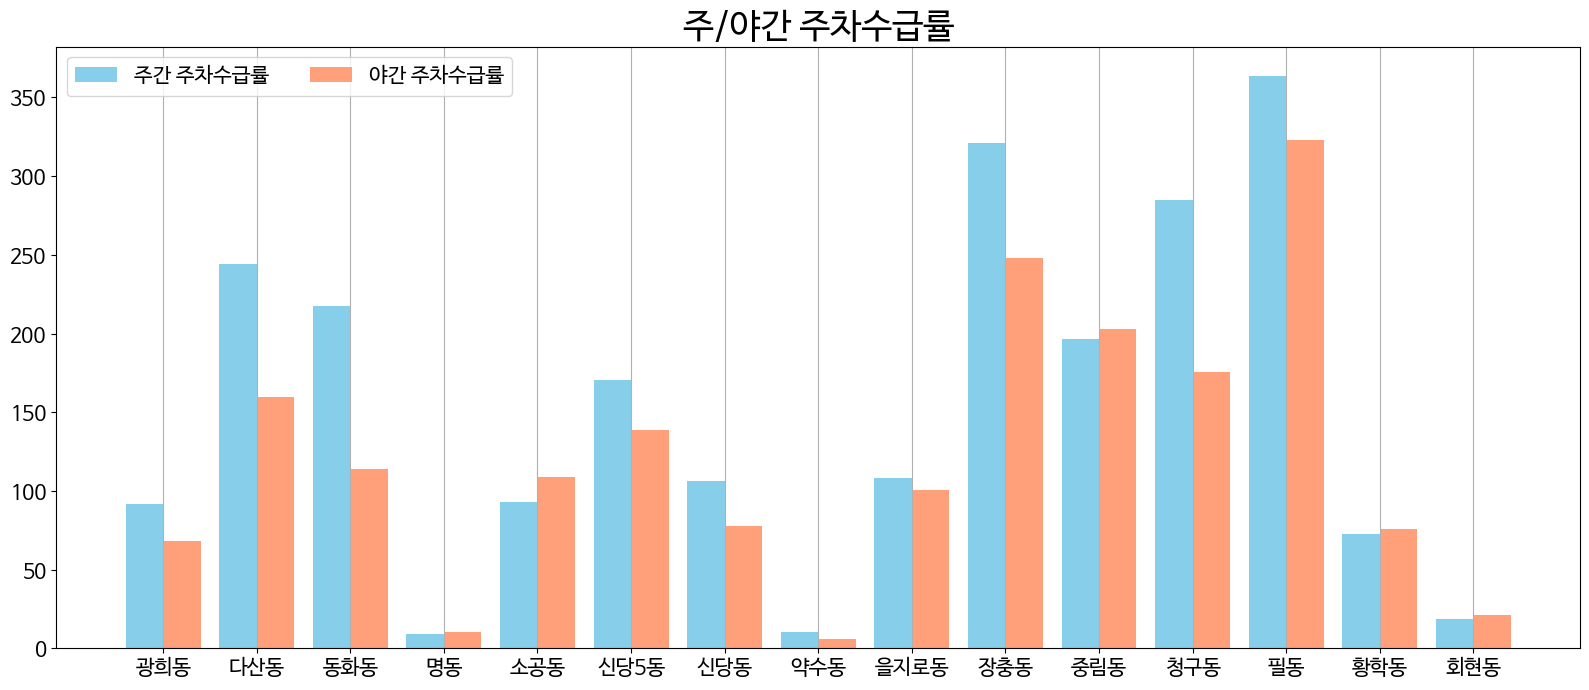

In [ ]:
np.random.seed(0)
N = 2
WIDTH = 0.8
BAR_WIDTH = WIDTH/N

n_data = 15
data1 = df_final['df_day_percent']
data2 = df_final['df_night_percent']
data_idx = np.arange(n_data)

fig, ax = plt.subplots(figsize=(16, 7))
xticks = df_final.index
plt.xticks(np.arange(0, 15, 1), labels=df_final.index)
plt.title('주/야간 주차수급률', fontsize=25)
ax.grid(axis='x')
ax.tick_params(labelsize=15)


ax.bar(data_idx - BAR_WIDTH/2, data1, width=BAR_WIDTH, label='주간 주차수급률', color = 'skyblue')
ax.bar(data_idx + BAR_WIDTH/2, data2, width=BAR_WIDTH, label='야간 주차수급률', color = 'lightsalmon')

ax.legend(loc='upper left', fontsize=15, ncol=2)

plt.tight_layout()
plt.tight_layout()

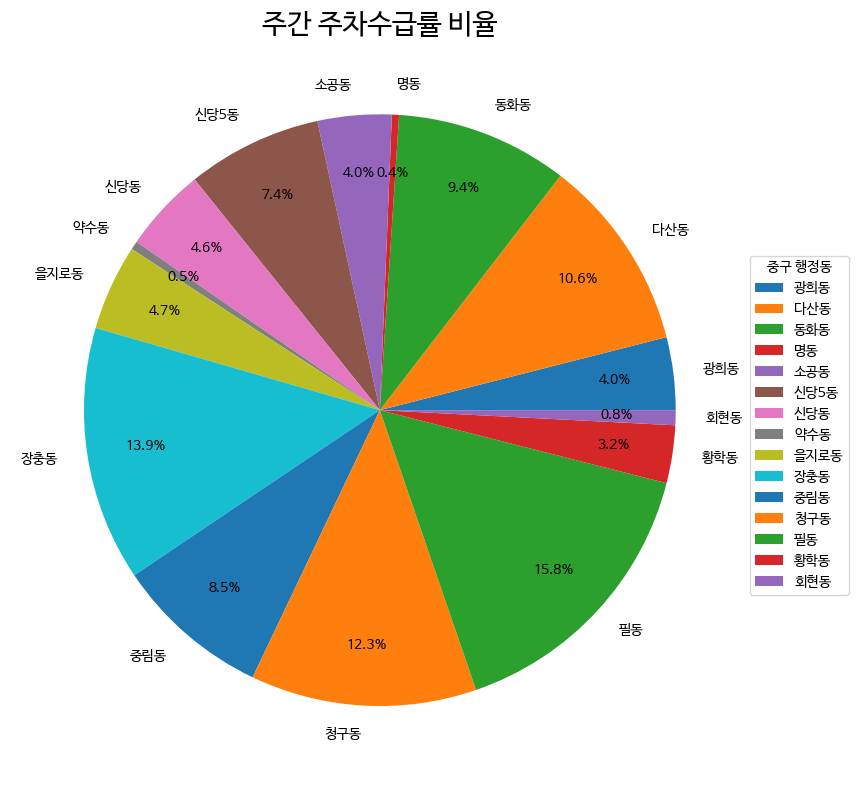

In [ ]:
plt.figure(figsize = (13, 8))
plt.pie(df_final['df_day_percent']*100, labels  = df_final.index, autopct = '%.1f%%', pctdistance = 0.8)
plt.title('주간 주차수급률 비율', size= 20)
plt.legend(df_final.index, loc =(1, 0.25), title = '중구 행정동' )
plt.tight_layout()
plt.show()

In [ ]:
df_final['df_day_percent']

dong
광희동      91.643148
다산동     244.317335
동화동     217.275917
명동        8.987807
소공동      93.211470
신당5동    170.429206
신당동     106.300639
약수동      10.633352
을지로동    108.208604
장충동     321.037533
중림동     196.311389
청구동     285.049690
필동      363.891923
황학동      72.808600
회현동      18.823225
Name: df_day_percent, dtype: float64

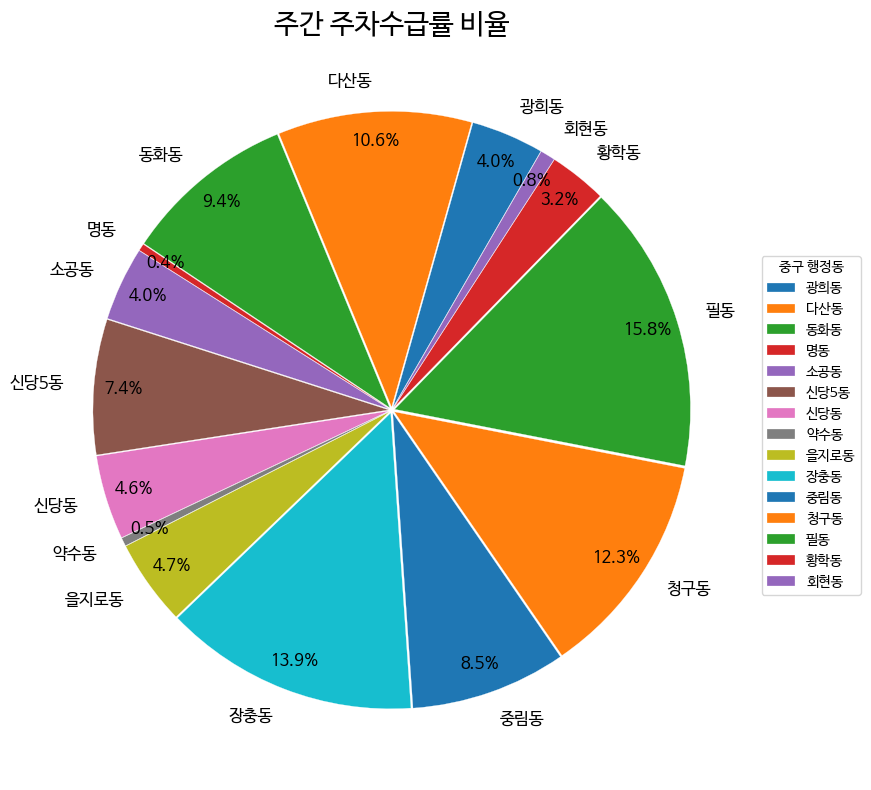

In [ ]:
plt.figure(figsize = (13, 8))
textprops = dict(weight = 3, color = 'black', size = 12)
wedgeprops={ 'edgecolor': 'w', 'linewidth': 0.2}
explode = [0.01] * len(df_final['df_day_percent'])
plt.pie(df_final['df_day_percent']*100, labels  = df_final.index, startangle = 60,
        autopct = '%.1f%%', pctdistance = 0.9, 
        explode = explode, textprops = textprops, wedgeprops = wedgeprops)
plt.title('주간 주차수급률 비율', size= 20)
plt.legend(df_final.index, loc =(1, 0.25), title = '중구 행정동')
plt.tight_layout()
plt.show()

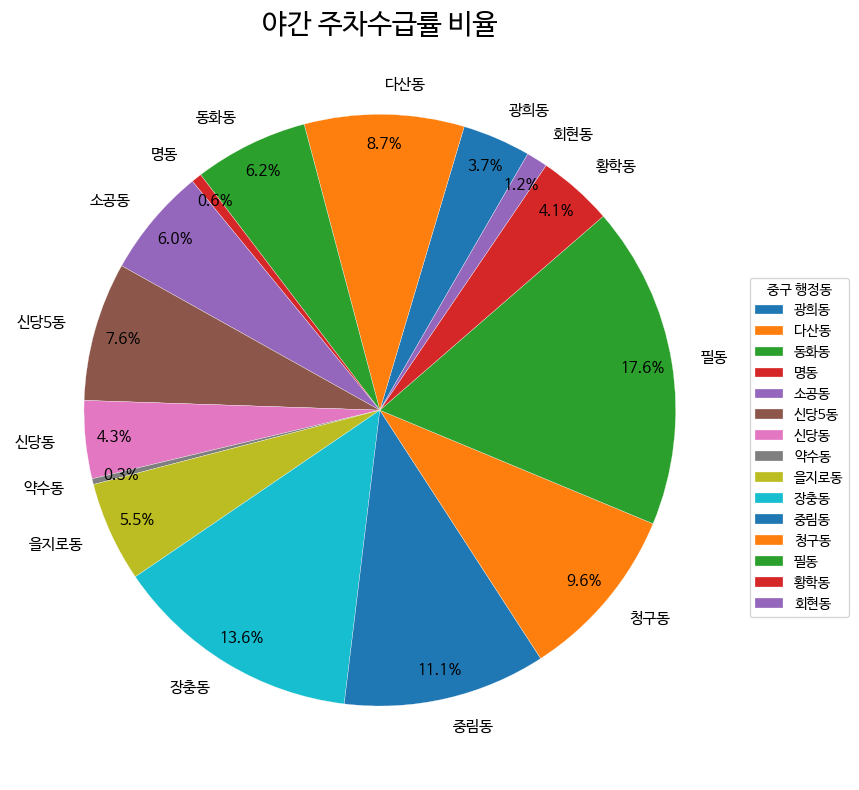

In [ ]:
plt.figure(figsize = (13, 8))
textprops = dict(weight = 3, color = 'black', size = 11)
wedgeprops={ 'edgecolor': 'w', 'linewidth': 0.2}
plt.pie(df_final['df_night_percent']*100, labels  = df_final.index, autopct = '%.1f%%', 
        wedgeprops = wedgeprops , startangle = 60,
        textprops = textprops,
        pctdistance = 0.9, shadow = False)
plt.title('야간 주차수급률 비율', size= 20)
plt.legend(df_final.index, loc =(1, 0.22), title = '중구 행정동' )
plt.tight_layout()
plt.show()

In [ ]:
url = "https://raw.githubusercontent.com/vuski/admdongkor/master/ver20230101/HangJeongDong_ver20230101.geojson"
text_data = urllib.request.urlopen(url).read().decode('utf-8')
geo = json.loads(text_data)

In [ ]:
type(geo)

dict

In [ ]:
df_final.index

Index(['광희동', '다산동', '동화동', '명동', '소공동', '신당5동', '신당동', '약수동', '을지로동', '장충동',
       '중림동', '청구동', '필동', '황학동', '회현동'],
      dtype='object', name='dong')

In [ ]:
df_final

,parking_size,df_day_demand,df_night_demand,df_day_percent,df_night_percent
dong,,,,,
광희동,32,0.349180,0.468743,91.643148,68.267660
다산동,67,0.274234,0.419560,244.317335,159.690967
동화동,27,0.124266,0.236558,217.275917,114.136708
명동,5,0.556309,0.482970,8.987807,10.352619
소공동,37,0.396947,0.338996,93.211470,109.145689
신당5동,39,0.228834,0.280704,170.429206,138.936230
신당동,36,0.338662,0.462399,106.300639,77.854823
약수동,2,0.188087,0.348375,10.633352,5.740935
을지로동,25,0.231035,0.249212,108.208604,100.316367


In [ ]:
df_final1 = df_final
df_final1["dong_full"] = ['중구 광희동', '중구 다산동', '중구 동화동', 
                          '중구 명동', '중구 소공동', '중구 신당5동', 
                          '중구 신당동', '중구 약수동', '중구 을지로동', 
                          '중구 장충동', '중구 중림동', '중구 청구동', 
                          '중구 필동', '중구 황학동', '중구 회현동']
df_final1                         

,parking_size,df_day_demand,df_night_demand,df_day_percent,df_night_percent,dong_full
dong,,,,,,
광희동,32,0.349180,0.468743,91.643148,68.267660,중구 광희동
다산동,67,0.274234,0.419560,244.317335,159.690967,중구 다산동
동화동,27,0.124266,0.236558,217.275917,114.136708,중구 동화동
명동,5,0.556309,0.482970,8.987807,10.352619,중구 명동
소공동,37,0.396947,0.338996,93.211470,109.145689,중구 소공동
신당5동,39,0.228834,0.280704,170.429206,138.936230,중구 신당5동
신당동,36,0.338662,0.462399,106.300639,77.854823,중구 신당동
약수동,2,0.188087,0.348375,10.633352,5.740935,중구 약수동
을지로동,25,0.231035,0.249212,108.208604,100.316367,중구 을지로동


In [ ]:
df_final2 = df_final1
df_final1["dong_center"] = ['광희동 주민센터', '다산동 주민센터', '동화동 주민센터', 
                          '명동 주민센터', '소공동 주민센터', '신당5동 주민센터', 
                          '신당동 주민센터', '약수동 주민센터', '을지로동 주민센터', 
                          '장충동 주민센터', '중림동 주민센터', '청구동 주민센터', 
                          '필동 주민센터', '황학동 주민센터', '회현동 주민센터']
df_final2    

,parking_size,df_day_demand,df_night_demand,df_day_percent,df_night_percent,dong_full,dong_center
dong,,,,,,,
광희동,32,0.349180,0.468743,91.643148,68.267660,중구 광희동,광희동 주민센터
다산동,67,0.274234,0.419560,244.317335,159.690967,중구 다산동,다산동 주민센터
동화동,27,0.124266,0.236558,217.275917,114.136708,중구 동화동,동화동 주민센터
명동,5,0.556309,0.482970,8.987807,10.352619,중구 명동,명동 주민센터
소공동,37,0.396947,0.338996,93.211470,109.145689,중구 소공동,소공동 주민센터
신당5동,39,0.228834,0.280704,170.429206,138.936230,중구 신당5동,신당5동 주민센터
신당동,36,0.338662,0.462399,106.300639,77.854823,중구 신당동,신당동 주민센터
약수동,2,0.188087,0.348375,10.633352,5.740935,중구 약수동,약수동 주민센터
을지로동,25,0.231035,0.249212,108.208604,100.316367,중구 을지로동,을지로동 주민센터


In [ ]:
df_final3 = df_final1.set_index(["dong_full"])
df_final3.index

Index(['중구 광희동', '중구 다산동', '중구 동화동', '중구 명동', '중구 소공동', '중구 신당5동', '중구 신당동',
       '중구 약수동', '중구 을지로동', '중구 장충동', '중구 중림동', '중구 청구동', '중구 필동', '중구 황학동',
       '중구 회현동'],
      dtype='object', name='dong_full')

In [ ]:
df_final3.dtypes

parking_size          int64
df_day_demand       float64
df_night_demand     float64
df_day_percent      float64
df_night_percent    float64
dong_center          object
dtype: object

# 중구에 text넣기

In [ ]:
junggu_hjd = df_final3.index
print(junggu_hjd)

Index(['중구 광희동', '중구 다산동', '중구 동화동', '중구 명동', '중구 소공동', '중구 신당5동', '중구 신당동',
       '중구 약수동', '중구 을지로동', '중구 장충동', '중구 중림동', '중구 청구동', '중구 필동', '중구 황학동',
       '중구 회현동'],
      dtype='object', name='dong_full')


In [ ]:
import geopy

In [ ]:
# geopy 라이브러리를 import 해주어야 함 
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea') 
# user_agent='South Korea' 한글주소를 지오코딩 할 수 있음

In [ ]:
# 위도, 경도값을 반환하는 함수 생성. 
def geocoding(r_add):
 geo = geo_local.geocode(r_add)
 x_y = [geo.latitude, geo.longitude] # 주소에 맞는 위도 경도를 [x, y] 형태의 리스트로 반환해라
 return x_y

In [ ]:
latitude = []
longitude= []
for i in junggu_hjd:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])


In [ ]:
locs = pd.DataFrame({'주소' :  junggu_hjd,
                     '위도' : latitude,
                     '경도' : longitude})
locs

,주소,위도,경도
0,중구 광희동,37.565563,127.007140
1,중구 다산동,37.554854,127.008070
2,중구 동화동,37.560769,127.017542
3,중구 명동,37.560898,126.986376
4,중구 소공동,37.563659,126.979496
5,중구 신당5동,37.563098,127.023029
6,중구 신당동,37.565197,127.013217
7,중구 약수동,37.549605,127.010108
8,중구 을지로동,37.566419,126.996862
9,중구 장충동,37.555775,127.002971


In [ ]:
locs_dict = {  '중구 광희동' : (37.565563, 127.007140),
             '중구 다산동' : (37.5548536, 127.00806994375606),
             '중구 동화동' : (37.56076865, 127.01754242531356),
             '중구 명동'  : (37.5608977, 126.9863762),
             '중구 소공동' : (37.5636592, 126.9794961),
             '중구 신당5동' : (37.5630982, 127.02302917950244),
             '중구 신당동' : (37.565196900000004, 127.01321661206495),
             '중구 약수동' : (37.549605400000004, 127.01010791943582),
             '중구 을지로동' :  (37.5664192, 126.9968622249919),
             '중구 장충동' : (37.55577485, 127.00297058462732),
             '중구 중림동' :  (37.5567609, 126.96630371330951),
             '중구 청구동' : (37.55658115, 127.01476532540082),
             '중구 필동' : (37.556779500000005,  126.99265768478287),
             '중구 황학동' : (37.5675499, 127.02172),
             '중구 회현동' : (37.5570967,  126.97622857990271)}


In [ ]:
print(locs_dict.keys())
print(df_final2.index)
list(locs_dict.keys()) == df_final3.index

dict_keys(['중구 광희동', '중구 다산동', '중구 동화동', '중구 명동', '중구 소공동', '중구 신당5동', '중구 신당동', '중구 약수동', '중구 을지로동', '중구 장충동', '중구 중림동', '중구 청구동', '중구 필동', '중구 황학동', '중구 회현동'])
Index(['광희동', '다산동', '동화동', '명동', '소공동', '신당5동', '신당동', '약수동', '을지로동', '장충동',
       '중림동', '청구동', '필동', '황학동', '회현동'],
      dtype='object', name='dong')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
list(locs_dict.keys())[1][2: ]

' 다산동'

In [ ]:
import folium
from folium.features import DivIcon

In [ ]:
# parking_size
map = folium.Map(location=[37.5639, 126.9953],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=14,            # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_final3['parking_size'],
               columns = [ df_final3.index, df_final3['parking_size']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'properties.temp',
               line_weight=1.5, # 경계선 굵기
               legend = 'parking size').add_to(map)

for key, value in locs_dict.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(50, 15),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.4rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key[2: ] + ''  + str()
            + "<br/><span style='color: blue; margin: 0px;'>: "
            + str(df_final3.loc[key, 'parking_size']) + '</span>'
            + '</b></div>',
        )).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# df_day_demand
map1 = folium.Map(location=[37.5639, 126.9953],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=14,            # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_final3['df_day_demand'],
               columns = [ df_final3.index, df_final3['df_day_demand']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'properties.temp',
               line_weight=1.5, # 경계선 굵기
               legend = 'the demand in the day').add_to(map1)

for key, value in locs_dict.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(50, 15),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.3rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key[2: ] + '' + str()
            + "<br/><span style='color: blue; margin: 0px;'>: "
            + str(round(df_final3.loc[key, 'df_day_demand'],2)) + '</span>'
            + '</b></div>',
        )).add_to(map1)
map1


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# df_night_demand
map2 = folium.Map(location=[37.5639, 126.9953],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=14,            # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_final3['df_night_demand'],
               columns = [ df_final3.index, df_final3['df_night_demand']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'properties.temp',
               line_weight=1.5, # 경계선 굵기
               legend = 'the demand in the night').add_to(map2)

for key, value in locs_dict.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(50, 15),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.3rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key[2:] + '' + str()
            + "<br/><span style='color: blue; margin: 0px;'>: "
            + str(round(df_final3.loc[key, 'df_night_demand'],2)) + '</span>'
            + '</b></div>',
        )).add_to(map2)
map2

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# df_day_demand
map3 = folium.Map(location=[37.5639, 126.9953],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=14,            # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_final3['df_day_percent'],
               columns = [ df_final3.index, df_final3['df_day_percent']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'properties.temp',
               line_weight=1.5, # 경계선 굵기
               legend = 'the percent in the day').add_to(map3)

for key, value in locs_dict.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(50, 15),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.3rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key[2:] + '' + str()
            + "<br/><span style='color: blue; margin: 0px;'>: "
            + str(round(df_final3.loc[key, 'df_day_percent'],2)) + '</span>'
            + '</b></div>',
        )).add_to(map3)
map3

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# df_night_percent
map4= folium.Map(location=[37.5639, 126.9953],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=14,            # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_final3['df_night_percent'],
               columns = [ df_final3.index, df_final3['df_night_percent']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'properties.temp',
               line_weight=1.5, # 경계선 굵기
               legend = 'the percent in the night').add_to(map4)

for key, value in locs_dict.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(50, 15),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.3rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key[2:] + '' + str()
            + "<br/><span style='color: blue; margin: 0px;'>: "
            + str(round(df_final3.loc[key, 'df_night_percent'],2)) + '</span>'
            + '</b></div>',
        )).add_to(map4)
map4

Output hidden; open in https://colab.research.google.com to view.